# Домашні завдання SciPy

In [34]:
import numpy as np
from scipy.interpolate import interp1d
from scipy import integrate
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Перше завдання

Є набір даних speed, який представляє значення швидкості для деякого транспортного засобу в певний момент спостереження. Очевидно, що дані мають дискретний вигляд. Відомо, що спостереження відбувалися з періодом в одну годину.

In [15]:
speed = [25, 35, 45, 30, 60, 120, 100, 100, 70, 75, 80, 65]

In [16]:
time = np.linspace(0, 11, num=12)
time

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

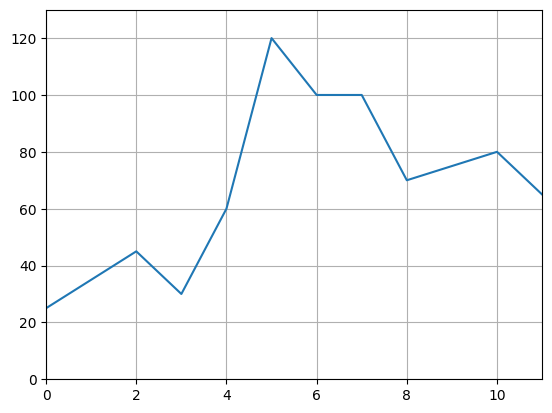

In [17]:
plt.plot(time, speed)
plt.xlim(0, 11)
plt.ylim(0, 130)
plt.grid()
plt.show()

In [21]:
f_cube = interp1d(time, speed, kind='cubic')

In [19]:
interp_time = np.linspace(0, 11, num=1000)

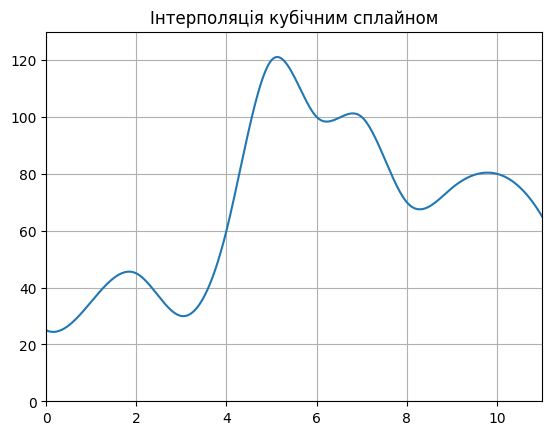

In [32]:
plt.plot(interp_time, f_cube(interp_time))
plt.title('Інтерполяція кубічним сплайном')
plt.xlim(0, 11)
plt.ylim(0, 130)
plt.grid()
plt.show()

In [30]:
integrate.quad(f_cube, 0, 11)

(761.586477590826, 8.076465307417539e-06)

In [26]:
f_quadratic = interp1d(time, speed, kind='quadratic')

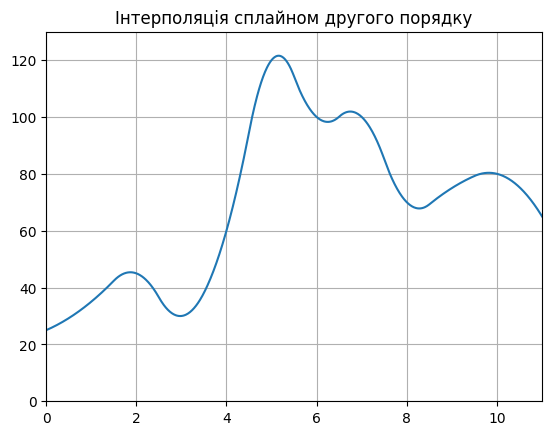

In [33]:
plt.plot(interp_time, f_quadratic(interp_time))
plt.title('Інтерполяція сплайном другого порядку')
plt.xlim(0, 11)
plt.ylim(0, 130)
plt.grid()
plt.show()

In [29]:
integrate.quad(f_quadratic, 0, 11)

(762.7374192196539, 8.908404552256347e-06)

## Друге завдання


Для прямокутної області площею 1000 м2, що примикає до прямої ділянки річки, необхідно побудувати огорожу (причому, зі сторони річки огорожу будувати не потрібно). За яких розмірів області a, b довжина огорожі буде мінімальною? Використовуйте функцію minimize з параметрами обмеженнями bounds і constraints

In [40]:
def size(x):
  return x[0] + x[1] + x[0]

In [39]:
def eq_constraint(x):
  return x[0] * x[1] - 1000

In [43]:
result = minimize(size, [10, 100],
         bounds=((1, 999), (1, 999)),
         constraints = [
    {'type': 'eq', 'fun': eq_constraint}
])

result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 89.44271906527332
       x: [ 2.236e+01  4.472e+01]
     nit: 11
     jac: [ 2.000e+00  1.000e+00]
    nfev: 34
    njev: 11

In [46]:
f"a={result.x[0]}, b={result.x[1]}, size={size(result.x)}, area={result.x[0]*result.x[1]}"

'a=22.360679091134543, b=44.72136088300423, size=89.44271906527332, area=999.9999992236749'